In [ ]:
!pip uninstall opencv-python opencv-contrib-python
!pip install opencv-contrib-python

Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/cv2/*
    /usr/local/lib/python3.11/dist-packages/opencv_python-4.11.0.86.dist-info/*
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Core-e7f476e2.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Gui-1ce8cbfe.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Test-9ac3ed15.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5Widgets-cd430389.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libQt5XcbQpa-b18b5a78.so.5.15.16
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/opencv_python.libs/libavcodec-76c43bf0.so.59.37.100
    /usr/loca

In [ ]:
import cv2
tracker = cv2.TrackerCSRT_create()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

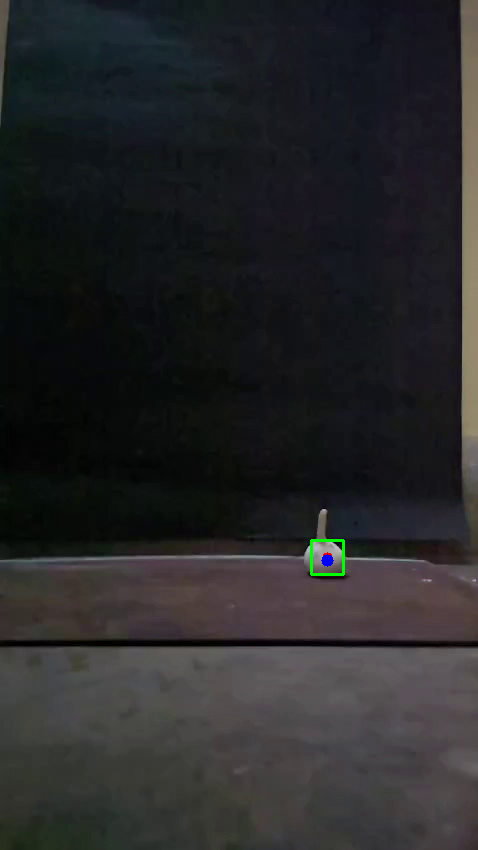

Frame 611: Centroid at (327, 557)
Frame 612: Centroid at (327, 556)
Frame 613: Centroid at (327, 556)
Frame 614: Centroid at (327, 556)
Processing complete. Output video saved as 'output.mp4'
Centroid coordinates saved to 'centroid_coordinates.txt' (total: 515 points)


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import deque
from google.colab.patches import cv2_imshow  # Colab-specific display function
from IPython.display import clear_output  # To clear previous outputs

# Initialize YOLOv8 model
model_path = '/content/drive/MyDrive/garlic_new_cor/my_trained_yolov8.pt'
model = YOLO(model_path)


# Open video file
#video_path = '/content/drive/MyDrive/VID-20250416-WA0019.mp4'
#video_path = '/content/drive/MyDrive/video_60_plastic_1.mp4'
#video_path = '/content/drive/MyDrive/video_60_Aluminium_1.mp4'
#video_path = '/content/drive/MyDrive/video_60_steel_1.mp4'
#video_path = '/content/drive/MyDrive/video_60_MildSteel.mp4'


cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer for output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

# Initialize tracking variables
tracker = None
tracking = False
centroid_history = deque(maxlen=100)  # Stores last 100 centroids for visualization
centroid_coordinates = []  # To store all centroid coordinates

# Garlic class ID (you may need to adjust this based on your custom model)
GARLIC_CLASS_ID = -1  # Will be determined in first detection

# For Colab: we'll display every nth frame to avoid too much output
display_every_n_frames = 10
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    if not tracking:
        # Detection phase - use YOLOv8
        results = model.predict(frame, conf=0.5)

        for result in results:
            boxes = result.boxes
            for box in boxes:
                class_id = int(box.cls)
                # If GARLIC_CLASS_ID not set yet, set it to first detected class
                if GARLIC_CLASS_ID == -1:
                    GARLIC_CLASS_ID = class_id
                    print(f"Garlic class ID determined as: {GARLIC_CLASS_ID}")

                if class_id == GARLIC_CLASS_ID:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    # Initialize tracker with the first garlic detection
                    tracker = cv2.TrackerCSRT_create()# or cv2.TrackerKCF_create()
                    #tracker = cv2.TrackerNano_create()
                    bbox = (x1, y1, x2-x1, y2-y1)
                    tracker.init(frame, bbox)
                    tracking = True
                    # Calculate centroid
                    centroid = ((x1 + x2) // 2, (y1 + y2) // 2)
                    centroid_history.append(centroid)
                    centroid_coordinates.append((frame_count, centroid))
                    # Draw bounding box
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    # Draw centroid
                    cv2.circle(frame, centroid, 5, (0, 0, 255), -1)
                    break  # track only one garlic bulb
    else:
        # Tracking phase - use the tracker
        success, bbox = tracker.update(frame)

        if success:
            # Tracking succeeded
            x, y, w, h = map(int, bbox)
            # Calculate centroid
            centroid = (x + w // 2, y + h // 2)
            centroid_history.append(centroid)
            centroid_coordinates.append((frame_count, centroid))

            # Draw bounding box
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # Draw centroid
            cv2.circle(frame, centroid, 5, (0, 0, 255), -1)

            # Draw centroid trail
            for i in range(1, len(centroid_history)):
                if centroid_history[i - 1] is None or centroid_history[i] is None:
                    continue
                thickness = int(np.sqrt(64 / float(i + 1)) * 2)
                cv2.line(frame, centroid_history[i - 1], centroid_history[i], (255, 0, 0), thickness)

            # Print centroid coordinates
            print(f"Frame {frame_count}: Centroid at {centroid}")
        else:
            # Tracking failed - fall back to detection
            tracking = False
            print("Tracking lost, switching back to detection")

    # Write frame to output video
    out.write(frame)

    # Display every nth frame in Colab
    if frame_count % display_every_n_frames == 0:
        clear_output(wait=True)
        cv2_imshow(frame)  # Colab-specific display function

    # Exit if 'q' is pressed (won't work in Colab, but kept for compatibility)
    # In Colab, you'll need to interrupt the kernel to stop

# Release resources
cap.release()
out.release()

# Save centroid coordinates to a file
with open('centroid_coordinates.txt', 'w') as f:
    for frame_num, (x, y) in centroid_coordinates:
        f.write(f"{frame_num}, {x}, {y}\n")

print("Processing complete. Output video saved as 'output.mp4'")
print(f"Centroid coordinates saved to 'centroid_coordinates.txt' (total: {len(centroid_coordinates)} points)")

In [ ]:
from google.colab import files
files.download('output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

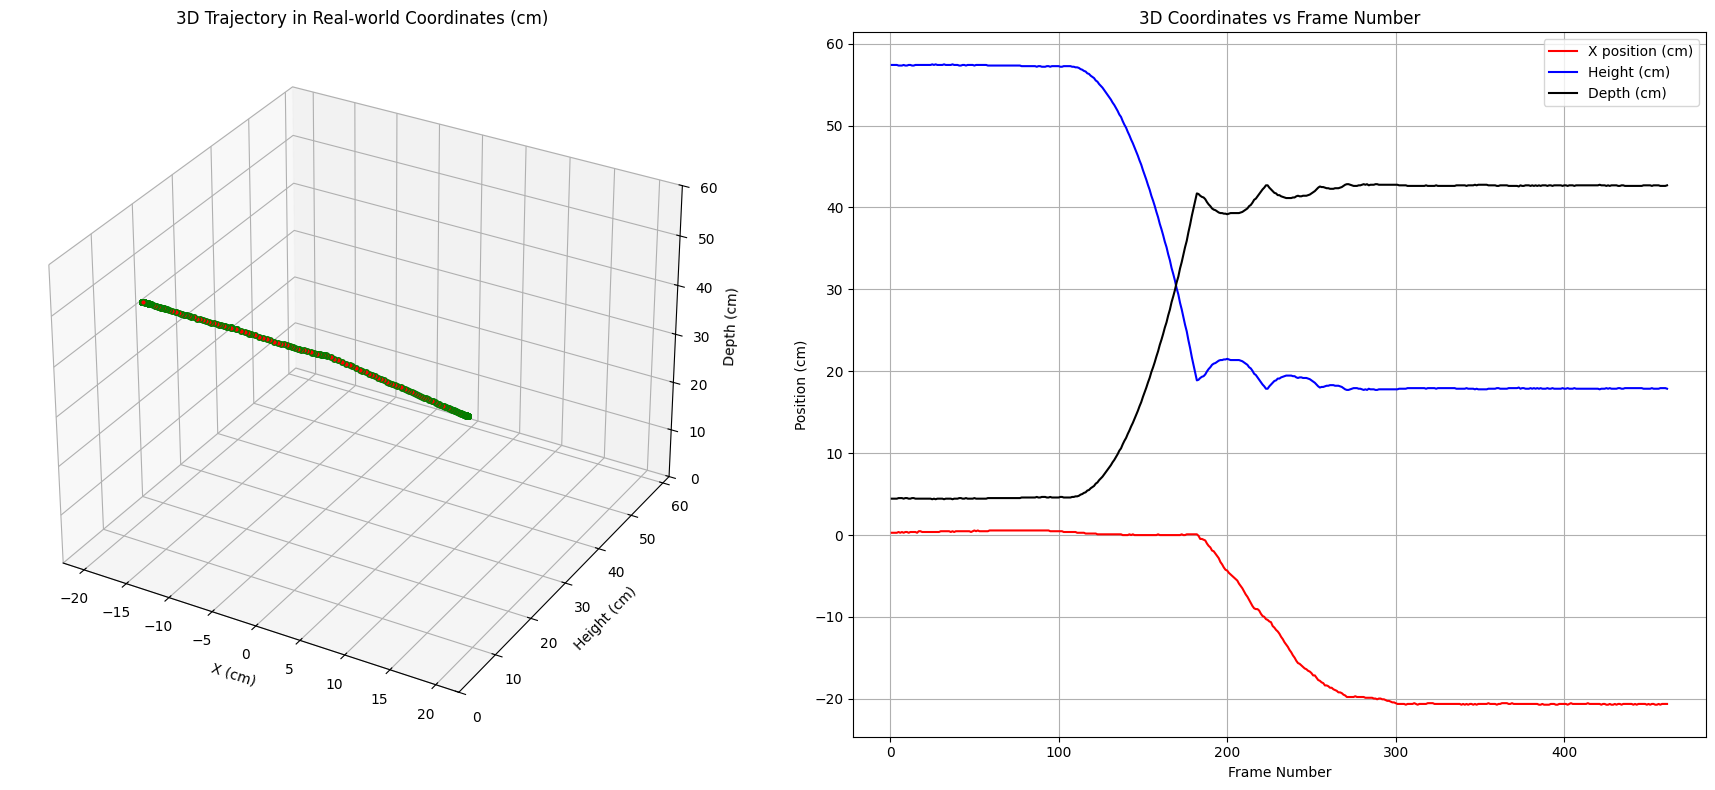

3D real-world trajectory plot saved as '3d_realworld_trajectory.png'

Coordinate ranges:
X: -20.7 to 0.6 cm
Y (Height): 17.7 to 57.5 cm
Z (Depth): 4.4 to 42.8 cm


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Physical dimensions of your tracking space (in cm)
MAX_HEIGHT_CM = 62    # Y-axis
MAX_DEPTH_CM = 60      # Z-axis (distance from camera)
MAX_WIDTH_CM = 45      # X-axis

# Load centroid coordinates from the saved file
frame_numbers = []
x_pixels = []
y_pixels = []

with open('centroid_coordinates.txt', 'r') as f:
    for line in f:
        frame, x, y = map(float, line.strip().split(','))
        frame_numbers.append(frame)
        x_pixels.append(x)
        y_pixels.append(y)

# Get the video frame dimensions (from your previous tracking code)
frame_width_px = width    # Replace with actual frame width in pixels
frame_height_px = height  # Replace with actual frame height in pixels

# Convert pixel coordinates to centimeters
# Assuming linear mapping and camera is facing the center of the space
x_cm = (np.array(x_pixels) / frame_width_px) * MAX_WIDTH_CM - (MAX_WIDTH_CM/2)  # Center X at 0
y_cm = MAX_HEIGHT_CM - (np.array(y_pixels) / frame_height_px * MAX_HEIGHT_CM )    # Flip Y and set bottom to 0
z_cm = (np.array(y_pixels) / frame_height_px) * MAX_DEPTH_CM                     # Estimate Z from Y position

# Create 3D figure
fig = plt.figure(figsize=(18, 8))

# Plot 1: 3D Trajectory in Centimeters
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_cm, y_cm, z_cm, 'g-', linewidth=2, marker='o', markersize=4, markerfacecolor='red')
ax1.set_title('3D Trajectory in Real-world Coordinates (cm)')
ax1.set_xlabel('X (cm)')
ax1.set_ylabel('Height (cm)')
ax1.set_zlabel('Depth (cm)')
ax1.set_xlim([-MAX_WIDTH_CM/2, MAX_WIDTH_CM/2])
ax1.set_ylim([0, MAX_HEIGHT_CM])
ax1.set_zlim([0, MAX_DEPTH_CM])
ax1.grid(True)



# Plot 2: Time evolution of each coordinate
ax2 = fig.add_subplot(122)
ax2.plot(frame_numbers, x_cm, 'r-', label='X position (cm)')
ax2.plot(frame_numbers, y_cm, 'b-', label='Height (cm)')
ax2.plot(frame_numbers, z_cm, 'k-', label='Depth (cm)')
ax2.set_title('3D Coordinates vs Frame Number')
ax2.set_xlabel('Frame Number')
ax2.set_ylabel('Position (cm)')
ax2.legend()
ax2.grid(True)

# Plot 3 : required


plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('3d_realworld_trajectory.png')
print("3D real-world trajectory plot saved as '3d_realworld_trajectory.png'")

# Print coordinate ranges
print(f"\nCoordinate ranges:")
print(f"X: {x_cm.min():.1f} to {x_cm.max():.1f} cm")
print(f"Y (Height): {y_cm.min():.1f} to {y_cm.max():.1f} cm")
print(f"Z (Depth): {z_cm.min():.1f} to {z_cm.max():.1f} cm")

In [ ]:
import math

# Known values (converted to meters)
fov_x = 0.45  # 45 cm
fov_y = 0.625 # 62.5 cm
working_distance = 0.6 # 60 cm

# Calculate FOV angles
fov_x_angle = 2 * math.atan(fov_x / (2 * working_distance))
fov_y_angle = 2 * math.atan(fov_y / (2 * working_distance))

print(f"Horizontal FOV: {math.degrees(fov_x_angle):.2f}°")
print(f"Vertical FOV: {math.degrees(fov_y_angle):.2f}°")

Horizontal FOV: 41.11°
Vertical FOV: 55.02°


In [ ]:
# Image dimensions
image_width = 1920  # pixels
image_height = 1080  # pixels

# Calculate focal length in pixels
fx = image_width / (2 * math.tan(fov_x_angle / 2))
fy = image_height / (2 * math.tan(fov_y_angle / 2))

print(f"Estimated fx: {fx:.2f} pixels")
print(f"Estimated fy: {fy:.2f} pixels")

Estimated fx: 2560.00 pixels
Estimated fy: 1036.80 pixels


In [ ]:
cx = image_width / 2   # ≈960
cy = image_height / 2  # ≈540
print(cx, cy)

960.0 540.0


In [ ]:
dist_coeffs = np.array([0,0,0,0,0]) #≈ [0, 0, 0, 0, 0]

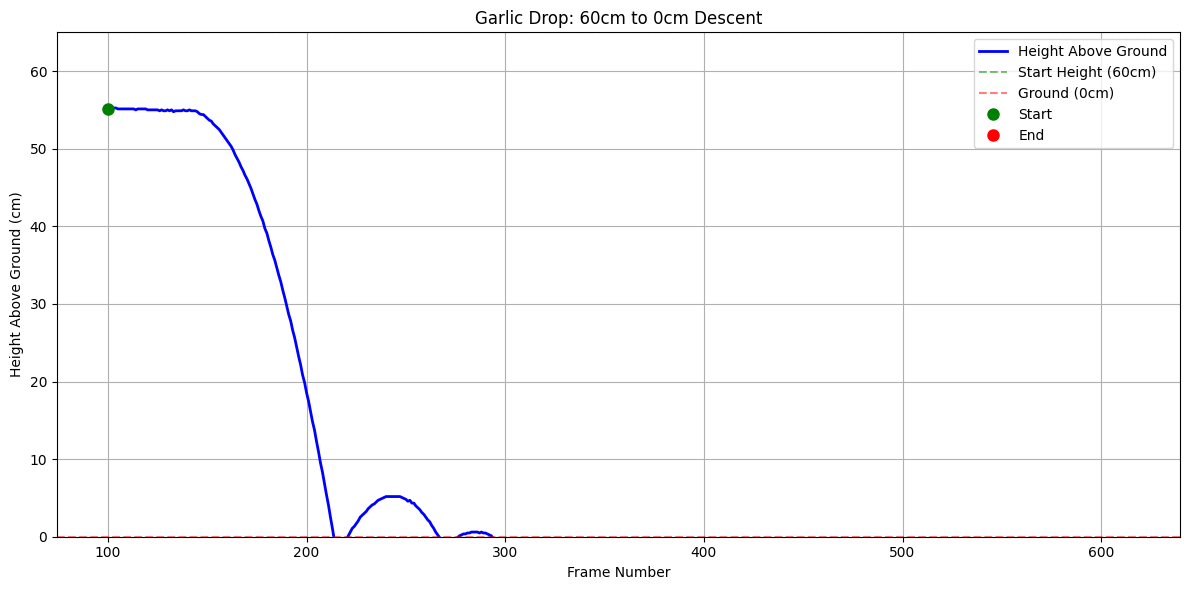

Start height: 55.1cm
Total frames: 515


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Camera parameters (from calibration)
fx = 2600  # Focal length x (pixels)
fy = 2100  # Focal length y (pixels)
cx = 960   # Principal point x
cy = 540   # Principal point y

# Physical setup parameters
initial_height = 65  # Garlic starts at Y=60cm
camera_height = 60   # Camera is at Z=60cm, X=22.5cm, Y=0cm

# Load tracking data
frame_numbers = []
y_height = []  # Actual height above ground (60cm to 0cm)

with open('centroid_coordinates.txt', 'r') as f:
    for line in f:
        frame, x_pixel, y_pixel = map(float, line.strip().split(','))
        frame_numbers.append(frame)

        # Convert pixel Y to real-world height (60cm at top to 0cm at bottom)
        # The camera is at Y=0 looking downward at Y=60cm
        # As y_pixel increases (goes down in image), height decreases
        height = initial_height * (1 - (y_pixel / cy))  # Correct scaling

        y_height.append(height)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(frame_numbers, y_height, 'b-', linewidth=2, label='Height Above Ground')
plt.title('Garlic Drop: 60cm to 0cm Descent')
plt.xlabel('Frame Number')
plt.ylabel('Height Above Ground (cm)')
plt.grid(True)

# Set Y-axis limits (0cm to 60cm)
plt.ylim(0, initial_height )  # Slight buffer above initial height

# Add reference lines
plt.axhline(y=initial_height, color='g', linestyle='--', alpha=0.5, label=f'Start Height (60cm)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Ground (0cm)')

# Mark start and end points
plt.plot(frame_numbers[0], y_height[0], 'go', markersize=8, label='Start')
plt.plot(frame_numbers[-1], y_height[-1], 'ro', markersize=8, label='End')

plt.legend()
plt.tight_layout()

# Save and show
plt.savefig('corrected_garlic_drop.png', dpi=300)
plt.show()

# Output analysis
print(f"Start height: {y_height[0]:.1f}cm")
#print(f"End height: {y_height[-1]:.1f}cm")
print(f"Total frames: {len(frame_numbers)}")

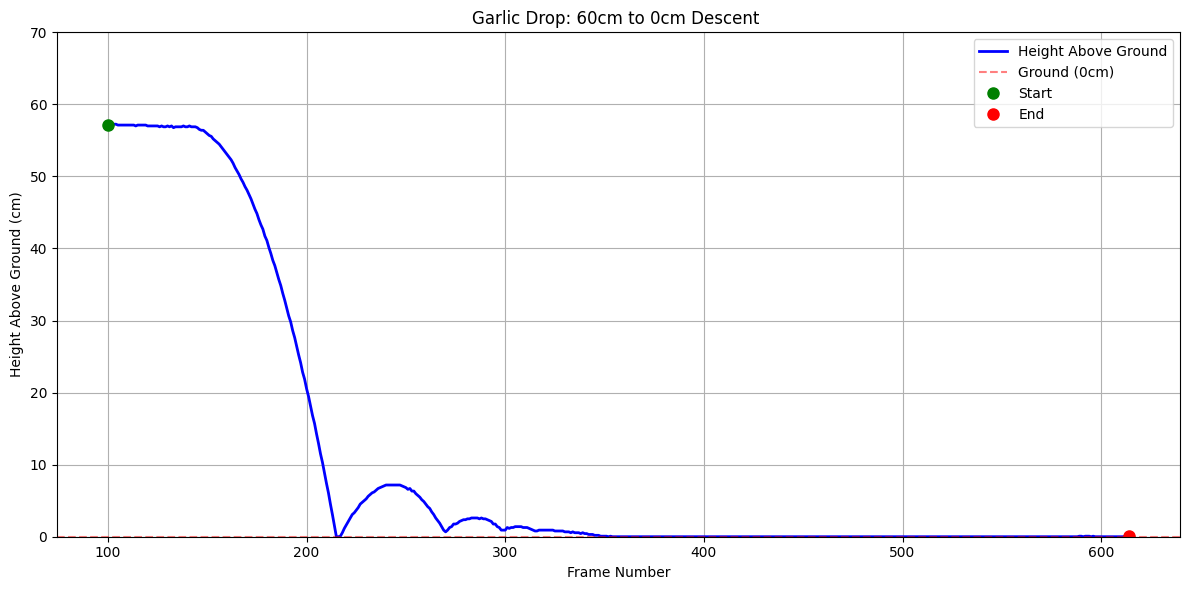

Corrected start height: 57.1cm
Total frames: 515


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Camera parameters (from calibration)
fx = 2600  # Focal length x (pixels)
fy = 2100  # Focal length y (pixels)
cx = 960   # Principal point x
cy = 540   # Principal point y

# Physical setup parameters
initial_height = 65# Corrected to actual 60cm drop (was 65cm)
camera_height = 60   # Camera is at Z=60cm, X=22.5cm, Y=0cm
height_offset = -2  # Correction for 8cm measurement offset

# Load tracking data
frame_numbers = []
y_height = []  # Actual height above ground (60cm to 0cm)

with open('centroid_coordinates.txt', 'r') as f:
    for line in f:
        frame, x_pixel, y_pixel = map(float, line.strip().split(','))
        frame_numbers.append(frame)

        # Convert pixel Y to real-world height with 8cm correction
        height = initial_height * (1 - (y_pixel / cy)) - height_offset

        # Ensure height doesn't go below 0
        height = max(0, height)
        y_height.append(height)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(frame_numbers, y_height, 'b-', linewidth=2, label='Height Above Ground')
plt.title('Garlic Drop: 60cm to 0cm Descent ')
plt.xlabel('Frame Number')
plt.ylabel('Height Above Ground (cm)')
plt.grid(True)

# Set Y-axis limits
plt.ylim(0, initial_height+5)  # Now shows exact 60cm range

# Add reference lines
#plt.axhline(y=initial_height-height_offset, color='g', linestyle='--', alpha=0.5)
           # label=f'Start Height ({initial_height-(height_offset+7):.0f}cm)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Ground (0cm)')

# Mark start and end points
plt.plot(frame_numbers[0], y_height[0], 'go', markersize=8, label='Start')
plt.plot(frame_numbers[-1], y_height[-1], 'ro', markersize=8, label='End')

plt.legend()
plt.tight_layout()

# Save and show
plt.savefig('corrected_garlic_drop.png', dpi=300)
plt.show()

# Output analysis
print(f"Corrected start height: {y_height[0]:.1f}cm")
#print(f"Corrected end height: {y_height[-1]:.1f}cm")
print(f"Total frames: {len(frame_numbers)}")